In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import random
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

In [3]:
train_dir = "C:\\Users\\hp\\OneDrive\\5th semester\\archive (16)\\train"

In [4]:
classes = os.listdir(train_dir)
dic = {}
for i in classes:
    dic[i] = len(os.listdir(os.path.join(train_dir, i)))

In [5]:
print("Class Distribution:")
for key, value in dic.items():
    print(f"{key}: {value}")

Class Distribution:
Acne and Rosacea Photos: 840
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions: 1149
Atopic Dermatitis Photos: 489
Bullous Disease Photos: 448
Cellulitis Impetigo and other Bacterial Infections: 288
Eczema Photos: 1235
Exanthems and Drug Eruptions: 404
Hair Loss Photos Alopecia and other Hair Diseases: 239
Herpes HPV and other STDs Photos: 405
Light Diseases and Disorders of Pigmentation: 568
Lupus and other Connective Tissue diseases: 420
Melanoma Skin Cancer Nevi and Moles: 463
Nail Fungus and other Nail Disease: 1040
Poison Ivy Photos and other Contact Dermatitis: 260
Psoriasis pictures Lichen Planus and related diseases: 1405
Scabies Lyme Disease and other Infestations and Bites: 431
Seborrheic Keratoses and other Benign Tumors: 1371
Systemic Disease: 606
Tinea Ringworm Candidiasis and other Fungal Infections: 1300
Urticaria Hives: 212
Vascular Tumors: 482
Vasculitis Photos: 416
Warts Molluscum and other Viral Infections: 1086


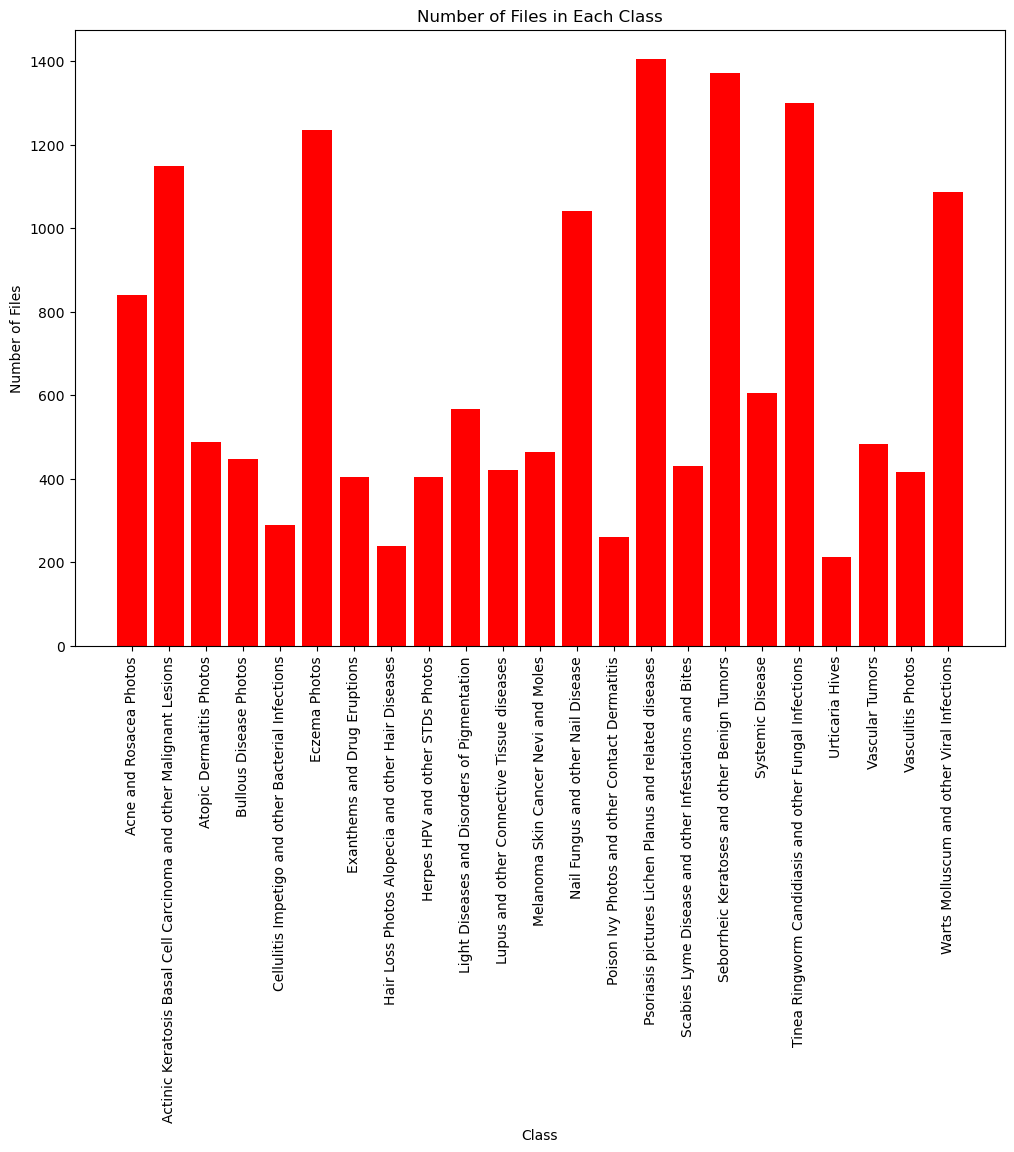

In [7]:
plt.figure(figsize=(12, 8))
plt.bar(dic.keys(), dic.values(), color = 'red')
plt.xticks(rotation=90)
plt.xlabel('Class')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Class')
plt.show()

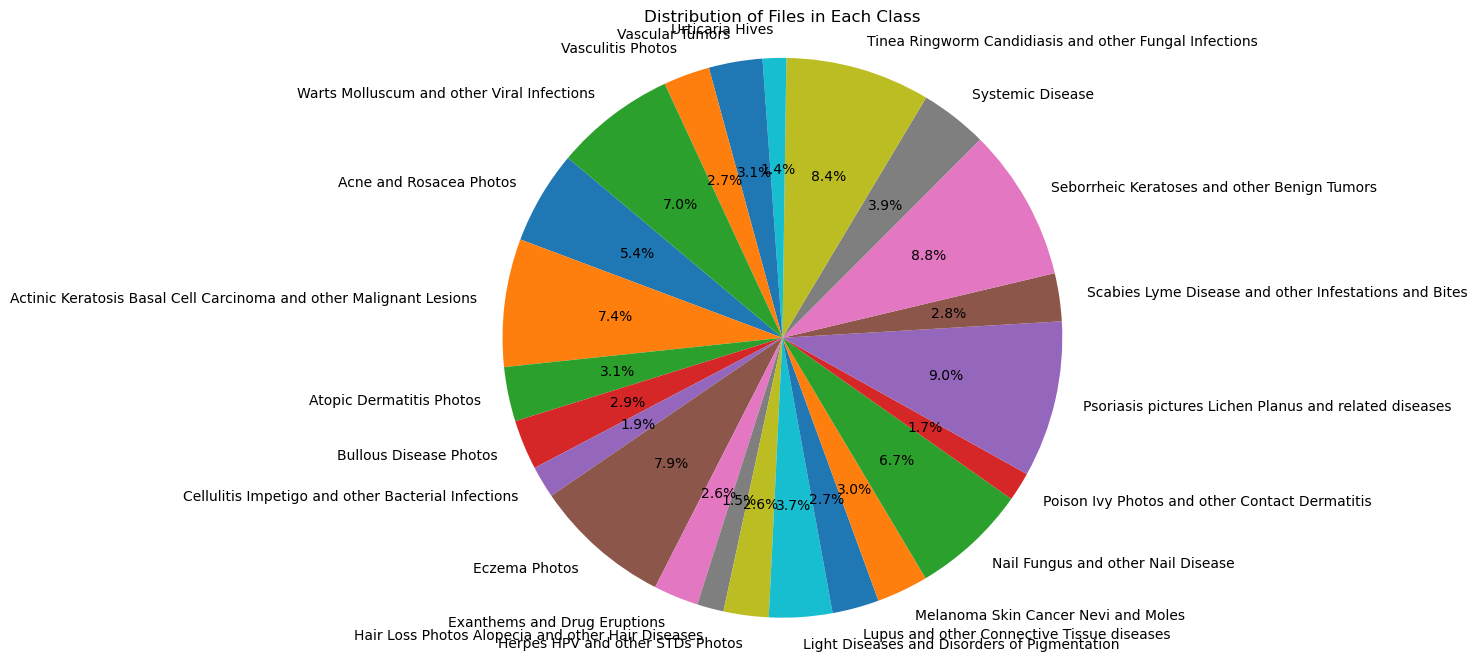

In [8]:
plt.figure(figsize=(12, 8))
plt.pie(dic.values(),
        labels=dic.keys(),
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 10})
plt.axis('equal')
plt.title('Distribution of Files in Each Class')
plt.show()

In [9]:
IMAGE_SIZE = (224, 224)
transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [10]:
class SkinDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.data = self.load_data()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return image, label

    def load_data(self):
        data = []
        for class_idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(self.root_dir, class_name)
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                data.append((img_path, class_idx))
        return data


In [11]:
train_dataset = SkinDataset(root_dir=train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [12]:
NUM_CLASSES = len(train_dataset.classes)
print(f"Number of classes: {NUM_CLASSES}")
print(f"Class names: {train_dataset.classes}")

Number of classes: 23
Class names: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


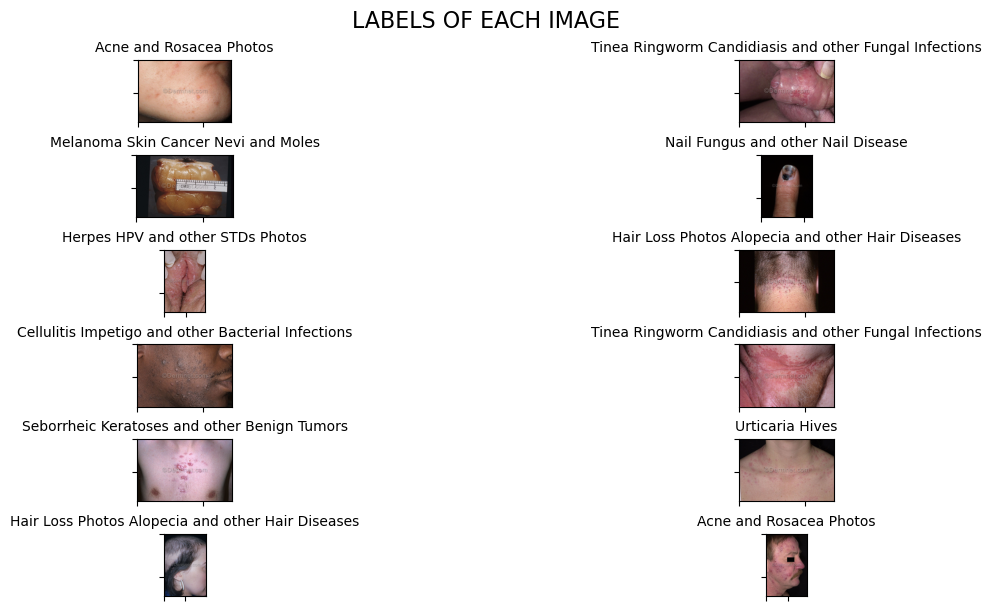

In [19]:
fig, axes = plt.subplots(6, 2, figsize=(12, 6), constrained_layout=True)
fig.suptitle('LABELS OF EACH IMAGE', fontsize=16)

for (img_path, label), ax in zip(random.sample(train_dataset.data, 12), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(False)
    ax.set_title(train_dataset.classes[label], fontsize=10)  
    
    img = cv2.imread(img_path)  
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    ax.imshow(img)  

plt.show()


In [20]:
def get_dimensions(filePath):
    img = cv2.imread(filePath)
    x, y, _ = img.shape
    return (x, y)

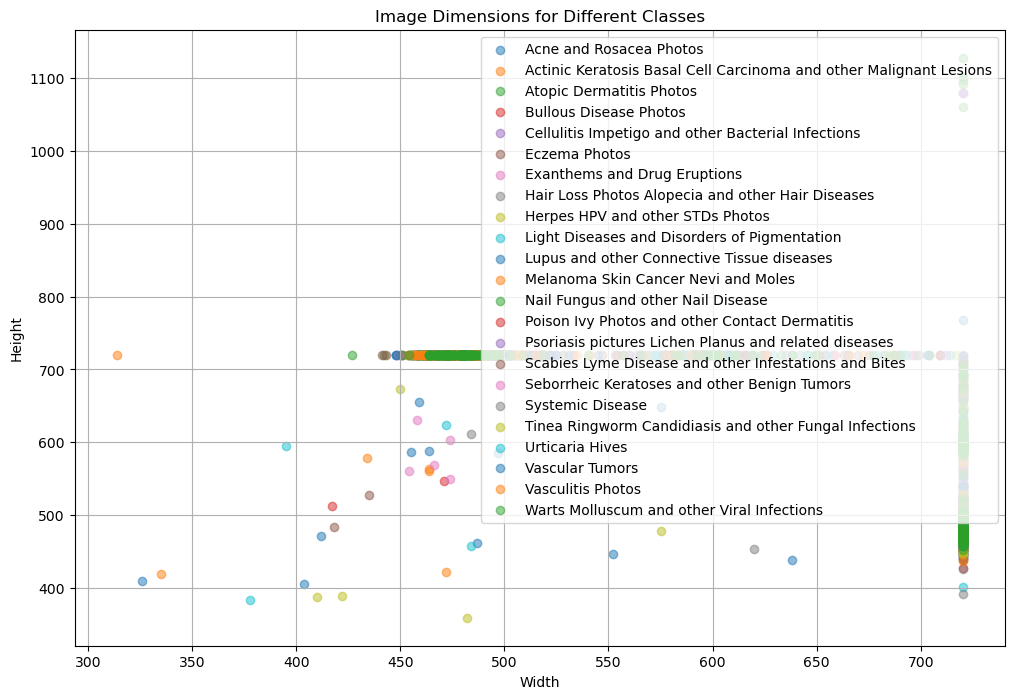

In [21]:
plt.figure(figsize=(12, 8))
plt.title('Image Dimensions for Different Classes')

for class_name in train_dataset.classes:
    class_dir = os.path.join(train_dir, class_name)
    heights = []
    widths = []
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        h, w = get_dimensions(img_path)
        heights.append(h)
        widths.append(w)
    plt.scatter(widths, heights, label=class_name, alpha=0.5)

plt.xlabel('Width')
plt.ylabel('Height')
plt.legend()
plt.grid(True)
plt.show()